### NOTE
I've used dark background for all matplotlib images, comment the following line in the following block to view default
``` python
plt.style.use('dark_background')
```

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# changing theme
plt.style.use('dark_background')
# clear image
%config InlineBackend.figure_format = 'retina'  

# Question 1

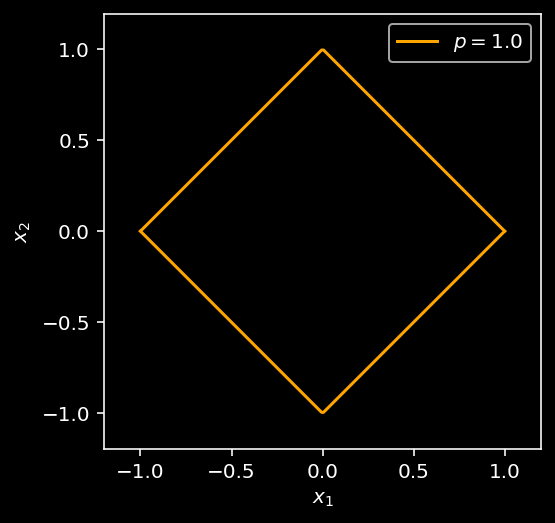

In [3]:
# Prompt user to enter a number, deafults at 0
str = input("Please enter p:")
try :
    p = float(str if str else 1)
except:
    raise ValueError("Enter a float")

def unit_ball(p):
    assert p>=0, "probability shouldn't be less than 0"
    x = np.linspace(-1,1,200)
    y_pos = (1-np.abs(x)**p)**(1/p)
    y_neg = y_pos.copy()*(-1)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y_pos, color='orange')
    ax.plot(x,y_neg, color='orange',label='$p={}$'.format(p))
    fig.gca().set_aspect('equal')
    ax.legend(loc='upper right')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.margins(0.1)
    return fig,ax

unit_ball(p)
plt.show()

### Convexity for $p\geq 1$

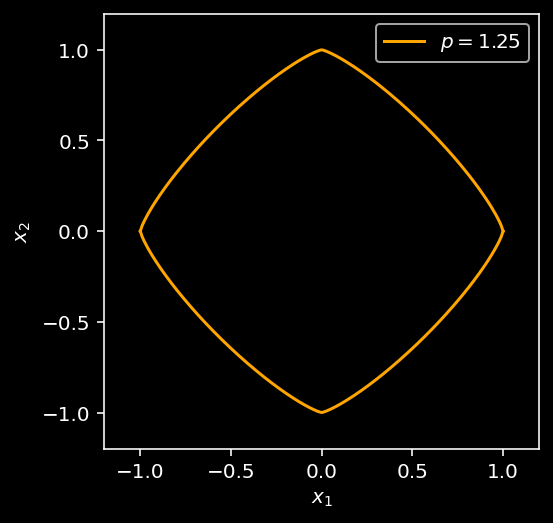

In [4]:
unit_ball(1.25)
plt.show()

It seems clear that the unit ball with $p\geq 1$ is convex

### Non convexity for &nbsp; $0<p<1$

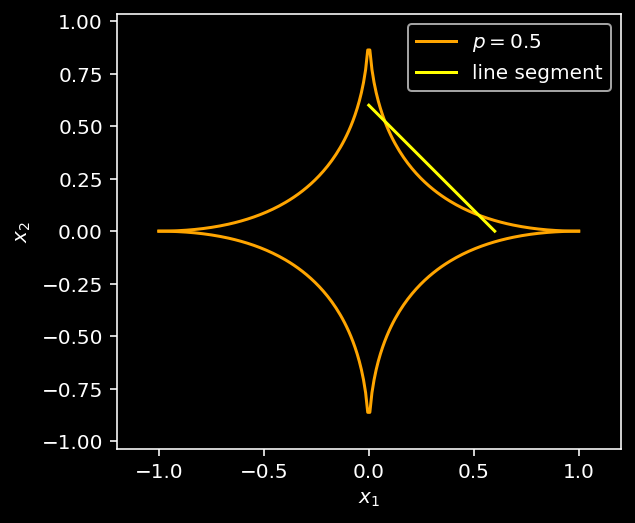

In [5]:
fig, ax = unit_ball(0.5)
ax.plot([0.6,0],[0,0.6],color='yellow',label='line segment')
ax.legend()
plt.show()

It can be clearly seen that the set is not convex, we can see a line exists which has end points in the unit ball but some points on the line lie outside the ball

# Question-2

$f_n(x)=x^n$, &nbsp; $x\in C[0,1]$      

$f(x) = \begin{cases} 1 & x=1\\ 0 & otherwise \end{cases} $         

$d(f,f_n) = \displaystyle \int_{0}^{1} x^n dx = \frac{1}{n+1} $     

$ \frac{1}{n+1}< \epsilon ,\, \forall n > \frac{1}{\epsilon},\, n \in \mathbb{N}$           

$f(x)$ is not a continuous function. 

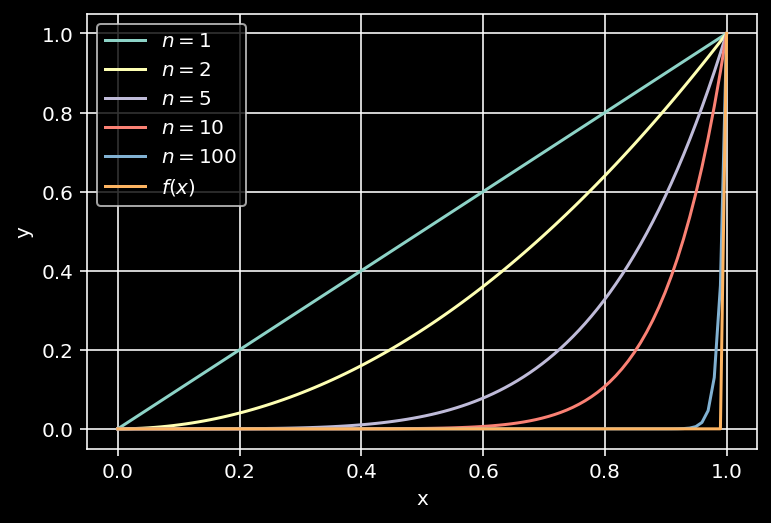

In [6]:
def f_n(x,n):
    return np.power(x,n)
def f(x):
    return np.where(x==1, 1, 0)

x = np.linspace(0,1,100)

plt.plot(x, f_n(x,1), label='$n=1$')
plt.plot(x, f_n(x,2), label='$n=2$')
plt.plot(x, f_n(x,5), label='$n=5$')
plt.plot(x, f_n(x,10), label='$n=10$')
plt.plot(x, f_n(x,100), label='$n=100$')
plt.plot(x, f(x), label='$f(x)$')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()



It can be seen above that $f_n(x) \rarr f(x)$, but $f(x)$ is not in the given function space, as it is not continuous

Now, to prove that the sequence of functions is cauchy      
\begin{align}
d(f_m(x)-f_n(x)) = \displaystyle \int_{0}^{1}\mid{x^m-x^n}\mid dx = \mid \frac{1}{m+1}-\frac{1}{n+1} \mid
\end{align}
Choose, $N>\frac{1}{\epsilon}$          
$\forall\ \epsilon\ \exists\ N \in \mathbb{N}\ :$
\begin{align}
\mid \frac{1}{m+1} - \frac{1}{n+1} \mid < \epsilon\ \forall\ m,n\ \geq\ N
\end{align}     
The sequence is cauchy, we proved earlier that it converges to $f$ which is not in the given space **or it can be said that the sequence doesn't converge in the given space**. Therefore, the space of continuous functions defined on $C[0,1]$ with respect to metric induced by $L_1$ norm

# Question-3


In [7]:
def E_p(px):
    return -np.sum((np.log2(px)*px),axis=0)

def H(pmf): # pmf is a dictionary
    p = np.array(list(pmf.values()))
    assert (p>=0).all(), "Probability should be non-negative"
    p = p/np.sum(p, axis=0)     # to normalise probability, incase the probabilities don't sum to 1
    p[p==0]=1                   # replacing p(x) by 1 makes log(p(x)) = 0 , thus making contribution 0
    entropy = E_p(p)  
    return entropy

pmf1 = {'rain':0.05,'sunny':0.8,'cloudy':0.15}
pmf2 = {'rain':1,'sunny':0.0,'cloudy':0}


print('for pmf1:',H(pmf1))
print('for pmf2:',H(pmf2))

for pmf1: 0.8841837197791889
for pmf2: -0.0


Maxima is achieved at p=0.5


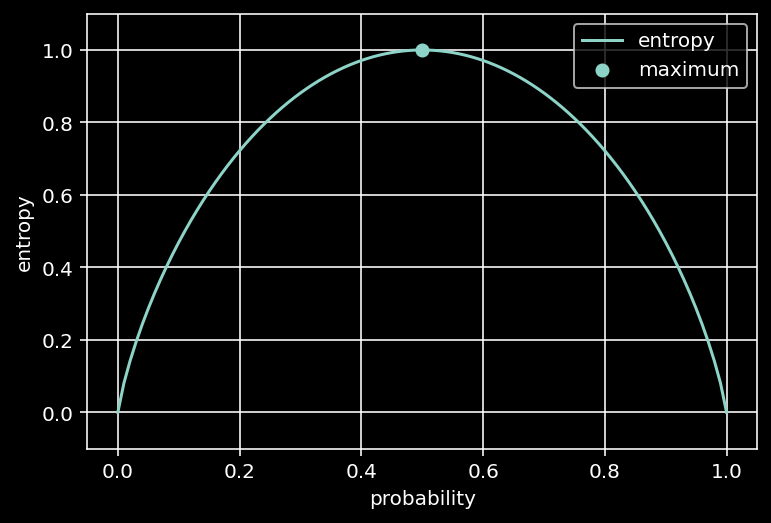

In [8]:
p = np.linspace(0,1,101)
bern = {0:p,1:1-p}
entropies = H(bern)
index = np.argmax(entropies)
print("Maxima is achieved at p={}".format(p[index]))
plt.plot(p,entropies,label='entropy')
plt.scatter(p[index],entropies[index],marker='o',label='maximum')
plt.xlabel('probability')
plt.ylabel('entropy')
plt.legend()
plt.grid()
plt.margins(y=0.1)
plt.show()

# Question-4


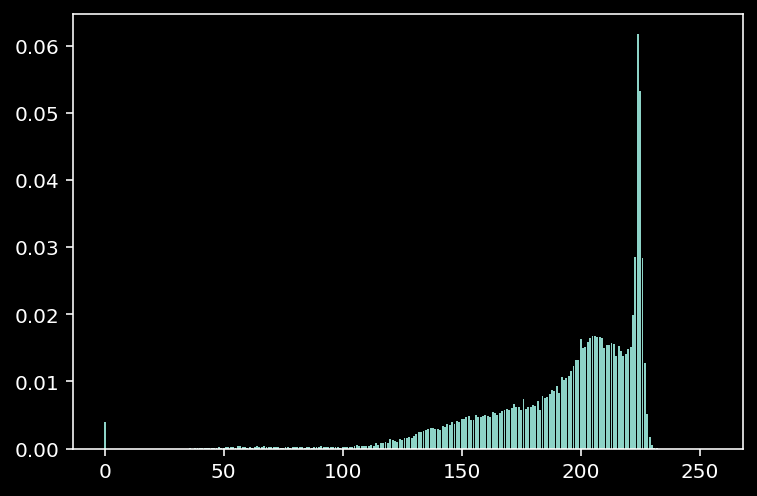

In [9]:
def normal_hist(img, plot=True):
    arr = np.zeros(256)
    img = img.flatten()
    np.add.at(arr,img,1)  # could be done with generator object, but add.at seems fancier, efficient
    arr = arr/img.shape[0]
    if plot:
        f = plt.figure()
        ax = f.add_subplot(1,1,1)
        ax.bar(np.arange(256),arr)
    return arr, (f,ax) if 'f' in locals() else (None,None)

img = mpimg.imread('misc/5.1.11.tiff')
count,(fig,ax) = normal_hist(img)
plt.show()

In [10]:
pmf = dict(zip(np.arange(256),count))
print(H(pmf))

6.452275232463875


# Question-5


In [11]:
# Joint Entropy
jointH = lambda Jpmf: H(dict(zip (np.arange(Jpmf.flatten().shape[0]), Jpmf.flatten() )))
# This accepts a numpy array (2D)

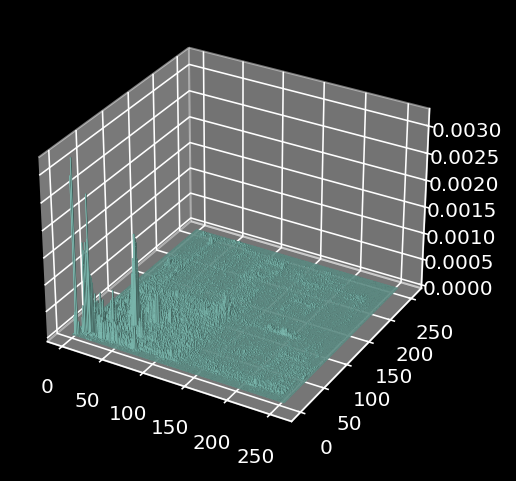

Entropy:13.67520326338231


In [14]:
def normal_JH(img1,img2, *args, **kwargs):
    plot = kwargs.get('plot',True)
    entropy = kwargs.get('H',True)
    arr = np.zeros((256,256))
    np.add.at(arr,(img1,img2),1)
    arr = arr/img1.shape[0]
    if plot:
        fig = plt.figure()
        _x = np.arange(256)
        _y = np.arange(256)
        _xx, _yy = np.meshgrid(_x, _y)
        x, y = _xx.ravel(), _yy.ravel()
        top = arr.flatten()
        width = depth =1
        axJH = fig.add_subplot(111, projection='3d')
        axJH.bar3d(x,y, np.zeros_like(top),width, depth, top, shade=True)
    if entropy:
        H_joint = jointH(arr)
    return arr, ax if 'axJH' in locals() else None, H_joint if 'H_joint' in locals() else None
    
img1 = (mpimg.imread('left.png')[:,:,0].flatten()*255).astype(int)
img2 = (mpimg.imread('right.png')[:,:,0].flatten()*255).astype(int)

hist, ax, entropy = normal_JH(img1,img2)
plt.show()
print("Entropy:{}".format(entropy))
